In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [9]:

df=pd.read_csv("C://Users//mvish//Desktop//exchange_rate.csv", parse_dates=['date'], index_col='date')

df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


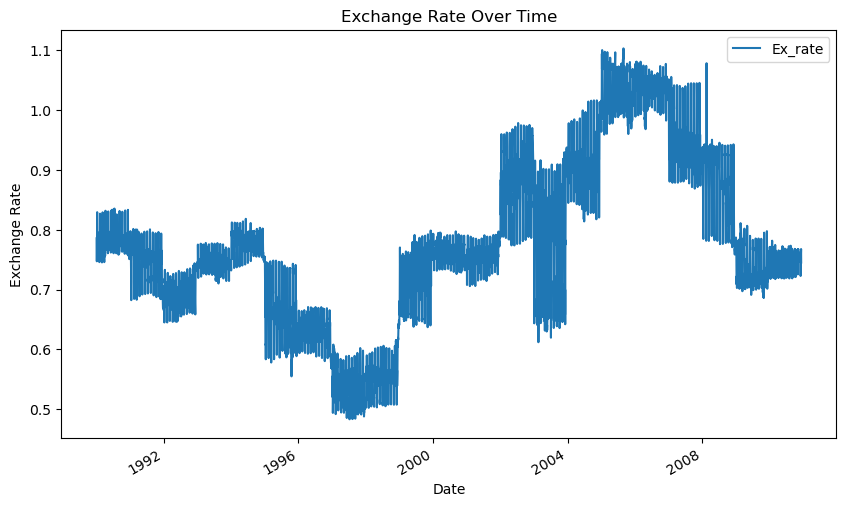

In [10]:
import matplotlib.pyplot as plt

# Plot the time series
df.plot(figsize=(10, 6))
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


In [11]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, handle them
df = df.fillna(method='ffill')  # Forward fill for simplicity

# Verify no missing values remain
print(df.isnull().sum())


Ex_rate    0
dtype: int64
Ex_rate    0
dtype: int64


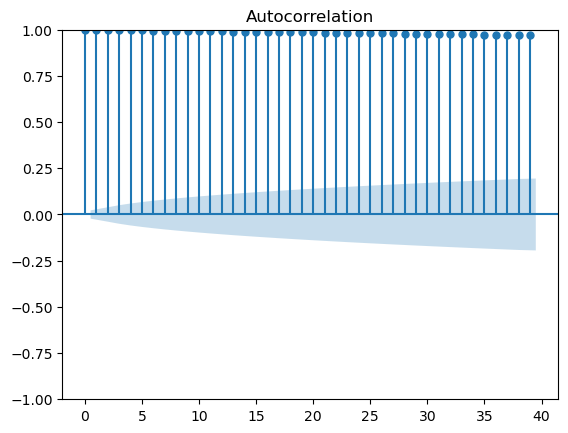

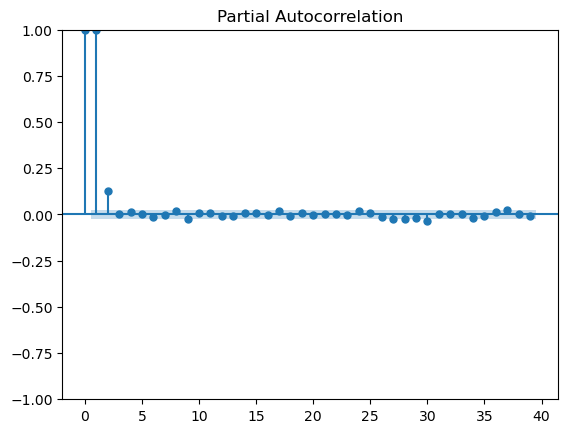

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(df)
plot_pacf(df)
plt.show()


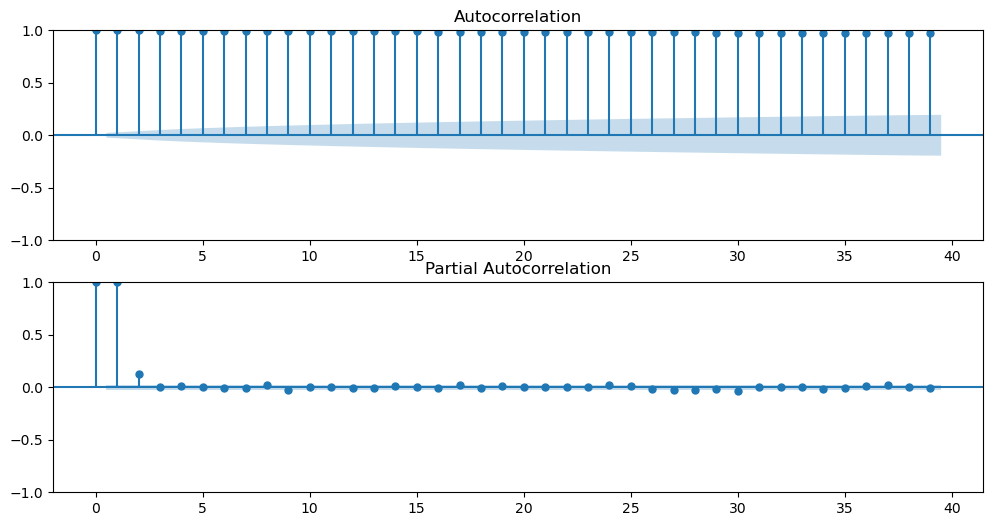

In [16]:

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df, ax=plt.gca())
plt.subplot(212)
plot_pacf(df, ax=plt.gca())
plt.show()

In [17]:
p, d, q = 1, 1, 1  # Example parameters, adjust based on your analysis


In [18]:
model_arima = ARIMA(df, order=(p, d, q))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mvish\anaconda3\Lib\site-

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 22 May 2024   AIC                         -56102.322
Time:                        09:54:31   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

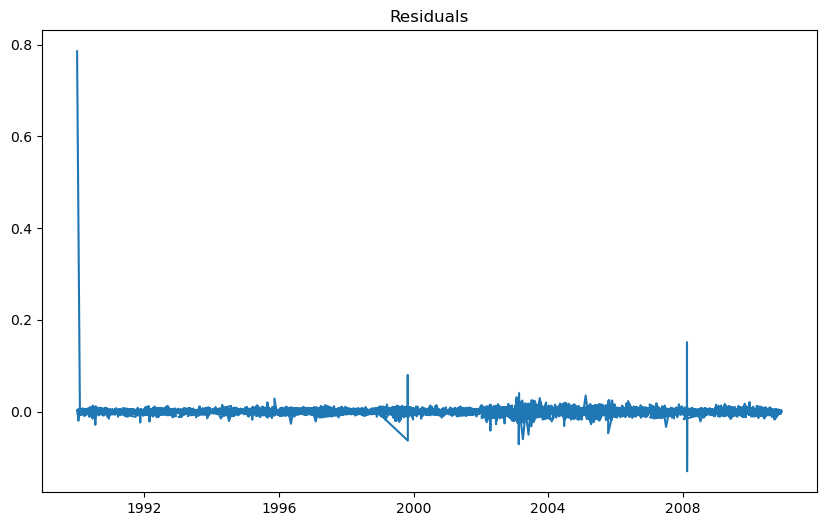

In [19]:
residuals = model_arima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [20]:
residuals

date
1990-01-01    0.785500
1990-02-01   -0.003700
1990-03-01    0.004414
1990-04-01   -0.000058
1990-05-01   -0.001189
                ...   
2010-06-10   -0.000343
2010-07-10    0.003317
2010-08-10    0.001797
2010-09-10   -0.002192
2010-10-10   -0.000311
Length: 7588, dtype: float64

C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


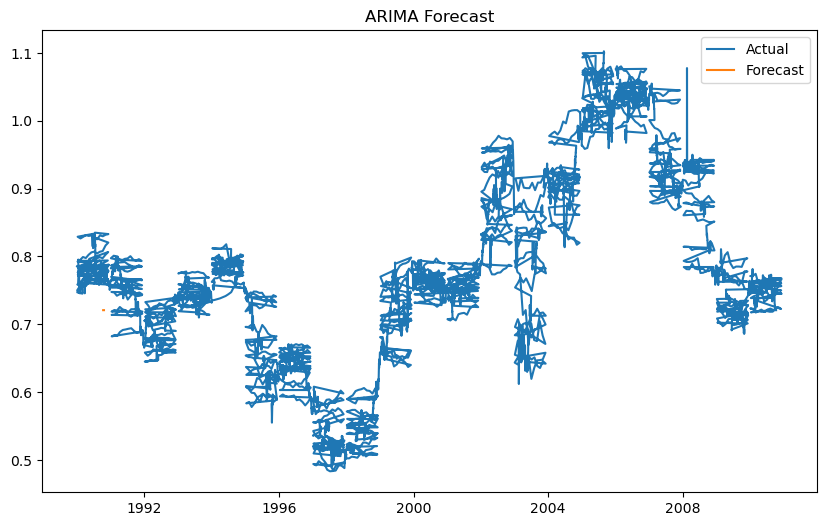

In [21]:
forecast_arima = model_arima_fit.forecast(steps=10)
plt.figure(figsize=(10, 6))
plt.plot(df, label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [22]:
forecast_arima

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
Name: predicted_mean, dtype: float64

In [23]:
# Fit the Exponential Smoothing model
model_es = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=12)
model_es_fit = model_es.fit()
print(model_es_fit.summary())

C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mvish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.611
Trend:                         Additive   BIC                         -77513.662
Seasonal:                      Additive   AICC                        -77624.520
Seasonal Periods:                    12   Date:                 Wed, 22 May 2024
Box-Cox:                          False   Time:                         09:55:44
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8700944                alpha                 True
smoothing_trend          

In [24]:
model_es

In [26]:
actual = df[-10:]  # Replace with actual future data if available
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = mean_squared_error(actual, forecast_arima, squared=False)
mape_arima = np.mean(np.abs((actual - forecast_arima) / actual)) * 100


C:\Users\mvish\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mvish\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
mae_arima

0.0015567712004380784

In [28]:
rmse_arima

0.0018425706107144816

In [29]:
mape_arima

7588      NaN
7589      NaN
7590      NaN
7591      NaN
7592      NaN
7593      NaN
7594      NaN
7595      NaN
7596      NaN
7597      NaN
Ex_rate   NaN
dtype: float64

In [30]:
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = mean_squared_error(actual, forecast_es, squared=False)
mape_es = np.mean(np.abs((actual - forecast_es) / actual)) * 100

C:\Users\mvish\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\mvish\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [31]:
mae_es

0.0015168856375351813

In [32]:
rmse_es

0.0017843933757437438

In [33]:
mape_es

7588      NaN
7589      NaN
7590      NaN
7591      NaN
7592      NaN
7593      NaN
7594      NaN
7595      NaN
7596      NaN
7597      NaN
Ex_rate   NaN
dtype: float64

In [34]:
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}')

ARIMA - MAE: 0.0015567712004380784, RMSE: 0.0018425706107144816, MAPE: 7588      NaN
7589      NaN
7590      NaN
7591      NaN
7592      NaN
7593      NaN
7594      NaN
7595      NaN
7596      NaN
7597      NaN
Ex_rate   NaN
dtype: float64
Exponential Smoothing - MAE: 0.0015168856375351813, RMSE: 0.0017843933757437438, MAPE: 7588      NaN
7589      NaN
7590      NaN
7591      NaN
7592      NaN
7593      NaN
7594      NaN
7595      NaN
7596      NaN
7597      NaN
Ex_rate   NaN
dtype: float64


In [ ]:
Explanation: Based on the error metrics, we can compare which model performs better in terms of accuracy and robustness.

In [ ]:
The ACF and PACF plots help identify the lags in the data, which are crucial for determining the parameters (p, d, q) for the ARIMA model.

ACF (Autocorrelation Function): Helps identify the number of lag observations in the autoregressive model.
PACF (Partial Autocorrelation Function): Helps determine the lag for the moving average model.
By examining these plots, we can make informed decisions on the order of the ARIMA model.